# Lab06: Logistic Regression and Evaluation Metrics
<hr>

110062802 呂宸漢

Predict the presence or absence of cardiac arrhythmia in a patien.

## 1. Loading of dataset

In [1]:
import pandas as pd
import numpy as np

# load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')


In [2]:
data['arrhythmia'] = data[len(data.columns) -
                          1].map(lambda x: 0 if x == 1 else 1)
data = data.drop(len(data.columns)-2, axis=1)


In [3]:
data = data._get_numeric_data()
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label


## 2. Splitting of dataset to training and testing data
test_size = 20% of the whole dataset

In [4]:
from sklearn.model_selection import train_test_split
# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20181004)


In [5]:
from sklearn.preprocessing import StandardScaler
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## 3. Building of a self-designed Logistic Regression model
Complete the TODO parts provided below

In [6]:
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate loss"""
        # TODO
        return np.sum(-y * np.log(output + 1e-9) - (1 - y) * np.log(1 - output + 1e-9))

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # TODO
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        net_input = self.net_input(X)
        output = self.activation(net_input)
        return (output >= 0.5)


## 4. Plotting of the confusion matrix
Label 0 as positive

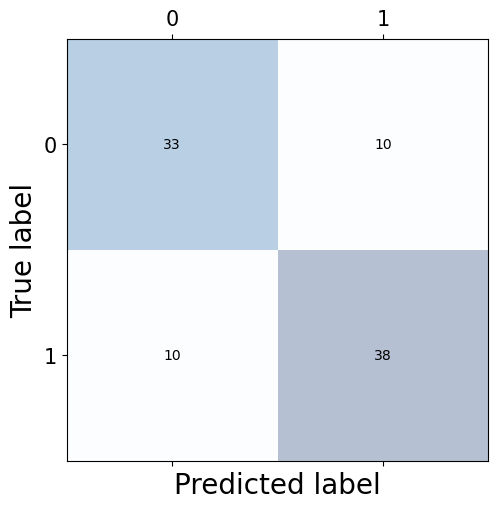

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

lr = LogisticRegression(eta=0.01, n_epoch=1000, random_state=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()


## 5. Computing the F1-score of this confusion matrix
The F1-score should be at least 0.75

In [8]:
from sklearn.metrics import f1_score
print(f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))


0.7674418604651162
